1.

Shape of image: (1029, 1500, 3)


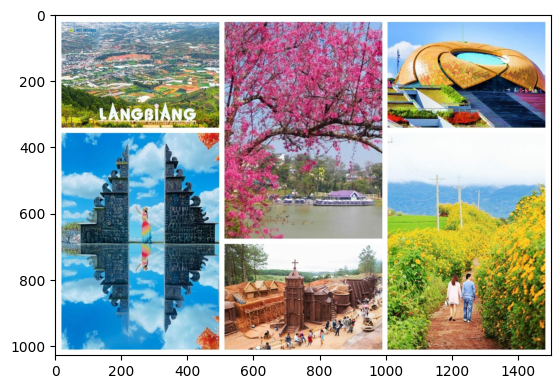

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('exercise/dalat.jpg')
print("Shape of image:", data.shape)

plt.imshow(data)
plt.show()

In [21]:
import cv2
import numpy as np

# Đọc ảnh Đà Lạt
image = cv2.imread('exercise/dalat.jpg')

# Tọa độ cho vùng LangBiang
x1, y1 = 10, 10
x2, y2 = 500, 350

# Lấy vùng LangBiang
langbiang_region = image[y1:y2, x1:x2]

# Tịnh tiến sang phải 100px
height, width, _ = langbiang_region.shape
langbiang_shifted = np.zeros_like(langbiang_region)
langbiang_shifted[:, 100:] = langbiang_region[:, :-100]

# Chuyển sang ảnh xám
gray = cv2.cvtColor(langbiang_shifted, cv2.COLOR_BGR2GRAY)

# Nhân giá trị pixel với 0.3
gray_adjusted = gray * 0.3
gray_adjusted = np.clip(gray_adjusted, 0, 255).astype(np.uint8)  # Đảm bảo giá trị nằm trong khoảng [0, 255]

# Áp dụng Otsu
_, otsu_result = cv2.threshold(gray_adjusted, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Lưu kết quả
cv2.imwrite('img/lang_biang.jpg', otsu_result)

# Hiển thị ảnh
cv2.imshow('LangBiang Otsu Result', otsu_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

2.

In [22]:
import cv2
import numpy as np

# Đọc ảnh Đà Lạt
image = cv2.imread('exercise/dalat.jpg')

# Tọa độ cho vùng chọn Hồ Xuân Hương
x1, y1 = 500, 10   # Tọa độ góc trên bên trái
x2, y2 = 1000, 690 # Tọa độ góc dưới bên phải

# Lấy vùng Hồ Xuân Hương
hoxuanhuong_region = image[y1:y2, x1:x2]

# Xoay đối tượng 45 độ
(h, w) = hoxuanhuong_region.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)  # 1.0 là tỉ lệ giữ nguyên kích thước
rotated = cv2.warpAffine(hoxuanhuong_region, M, (w, h))

# Chuyển sang ảnh xám
gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)

# Áp dụng Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY, 11, 60)

# Lưu kết quả
cv2.imwrite('img/ho_xuan_huong.jpg', adaptive_thresh)

# Hiển thị kết quả
cv2.imshow('Ho Xuan Huong', adaptive_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

3.

In [23]:
import cv2
import numpy as np

# Đọc ảnh Đà Lạt
image = cv2.imread('exercise/dalat.jpg')

# Tọa độ cho vùng chọn Quản trường Lâm Viên
x1, y1 = 1000, 10   
x2, y2 = 1490, 350   

# Lấy vùng Quản trường Lâm Viên
quan_truong_region = image[y1:y2, x1:x2]

# Chuyển sang ảnh xám
gray = cv2.cvtColor(quan_truong_region, cv2.COLOR_BGR2GRAY)

# Áp dụng Coordinate Mapping (giả lập bằng việc thay đổi kích thước)
mapped_region = cv2.resize(gray, (quan_truong_region.shape[1] // 2, quan_truong_region.shape[0] // 2))

# Áp dụng Binary Closing
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
binary_closed = cv2.morphologyEx(mapped_region, cv2.MORPH_CLOSE, kernel)

# Lưu kết quả
cv2.imwrite('img/quan_truong_lam_vien.jpg', binary_closed)

# Hiển thị kết quả
cv2.imshow('Quan Truong Lam Vien', binary_closed)
cv2.waitKey(0)
cv2.destroyAllWindows()